# **Email Spam Classifier**

### **Team Members :** Aswin Balaji Thippa Ramesh, Gowri Sriram Lakshmanan, Pramod Krishnachari

In [114]:
!pip3 install wordcloud
!pip3 install gdown
!pip3 install nbformat
!pip install --upgrade nbformat


### **Importing Necessary packages**

In [116]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import nltk
import re
import string
import nltk
from nltk.corpus import stopwords #Natural Language Toolkit
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import gdown
import plotly.express as px

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### **Loading the data**

In [118]:
#Load data & print samples
df = pd.read_csv('combined_data.csv')
df.head()

v1                                                 v2 Unnamed: 2 Unnamed: 3  \
0  1  ounce feather bowl hummingbird opec moment ala...        NaN        NaN   
1  1  wulvob get your medircations online qnb ikud v...        NaN        NaN   
2  0   computer connection from cnn com wednesday es...        NaN        NaN   
3  1  university degree obtain a prosperous future m...        NaN        NaN   
4  0  thanks for all your answers guys i know i shou...        NaN        NaN   

  Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ...  \
0        NaN        NaN        NaN        NaN        NaN        NaN  ...   
1        NaN        NaN        NaN        NaN        NaN        NaN  ...   
2        NaN        NaN        NaN        NaN        NaN        NaN  ...   
3        NaN        NaN        NaN        NaN        NaN        NaN  ...   
4        NaN        NaN        NaN        NaN        NaN        NaN  ...   

  Unnamed: 412 Unnamed: 413 Unnamed: 414 Unnamed: 415 Unnamed: 416  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 417 Unnamed: 418 Unnamed: 419 Unnamed: 420 Unnamed: 421  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 422 columns]

### **EDA**

#### 1) Removal of irrelevant columns

In [121]:
#Let's drop the non-relevant unnamed columns
df=df[['v1','v2']]
df.head()

v1                                                 v2
0  1  ounce feather bowl hummingbird opec moment ala...
1  1  wulvob get your medircations online qnb ikud v...
2  0   computer connection from cnn com wednesday es...
3  1  university degree obtain a prosperous future m...
4  0  thanks for all your answers guys i know i shou...

#### 2) Renaming Columns

In [123]:
# Renaming v1 & v2 as Category & Text
df=df.rename(columns={"v1":"Category","v2":"Text"})

# Keep only rows where Category is 0 or 1
df = df[df['Category'].isin([0, 1, '0', '1'])]

# Convert to integer if needed
df['Category'] = df['Category'].astype(int)

# Map 0 → ham, 1 → spam
df['Category'] = df['Category'].map({0: 'ham', 1: 'spam'})

#Sample post modifications
df.head()

Category                                               Text
0     spam  ounce feather bowl hummingbird opec moment ala...
1     spam  wulvob get your medircations online qnb ikud v...
2      ham   computer connection from cnn com wednesday es...
3     spam  university degree obtain a prosperous future m...
4      ham  thanks for all your answers guys i know i shou...

#### 3) Shape of the dataset

In [125]:
#Let's check the length of the dataset
print(" Total number of rows in the dataset are", len(df))

 Total number of rows in the dataset are 83459


#### 4) Dataset Description

In [127]:
#Descriptive Summary of the dataset
df.describe()

Category    Text
count     83459   83445
unique        2   83440
top        spam  #NAME?
freq      43921       3

#### 5) Checking class distribution

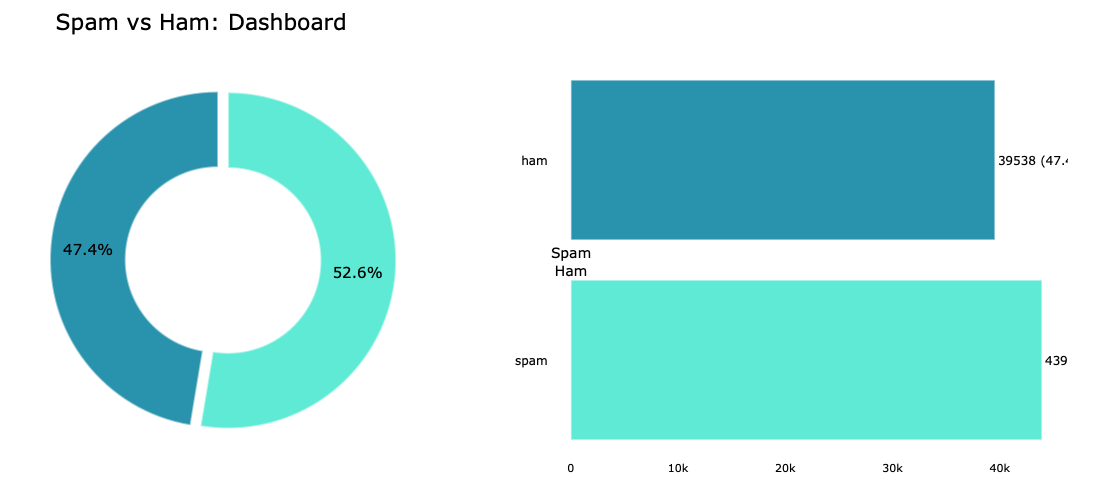

In [131]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is already defined
value_counts = df['Category'].value_counts()
labels = value_counts.index.tolist()
values = value_counts.values.tolist()

# Smooth neon palette
colors = ["#5eead4", "#2993ae", "#c4b5fd"]  # Teal, Peach, Lavender

# Create figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{'type': 'domain'}, {'type': 'xy'}]],
    horizontal_spacing=0.15
)

# Donut chart
fig.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.55,
    marker=dict(
        colors=colors,
        line=dict(color='rgba(255,255,255,0.5)', width=2)  # soft glow effect
    ),
    hoverinfo="label+value+percent",
    textinfo='percent',
    textfont=dict(size=15, color='Black'),
    pull=[0.03] * len(labels),
), row=1, col=1)

# Bar chart
fig.add_trace(go.Bar(
    x=values,
    y=labels,
    orientation='h',
    text=[f"{val} ({(val/sum(values))*100:.1f}%)" for val in values],
    textposition='outside',
    marker=dict(
        color=colors,
        line=dict(color='rgba(255,255,255,0.6)', width=1.5)  # softer bar outline
    ),
), row=1, col=2)

# Layout
fig.update_layout(
    title='Spam vs Ham: Dashboard',
    title_font=dict(size=22, color='Black'),
    annotations=[dict(text='Spam<br>Ham', x=0.18, y=0.5, font_size=14, showarrow=False, font_color='Black')],
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    plot_bgcolor='rgba(0,0,0,0)',   # Transparent plot area
    font=dict(color='Black', size=12),
    margin=dict(t=60, l=50, r=50, b=40),
    height=500,
    width=1000,
    showlegend=False,
)

# Axes styling
fig.update_xaxes(
    showgrid=False,
    zeroline=False,
    color='Black',
    tickfont=dict(size=11)
)
fig.update_yaxes(
    showgrid=False,
    zeroline=False,
    color='Black',
    tickfont=dict(size=12)
)

fig.show()


In [132]:
#Let's create a column to check of each text & plot a histogram to check the distirbution
df = df.dropna(subset=['Text'])
df['Length']=df['Text'].apply(len)
display(df.head())

Category                                               Text  Length
0     spam  ounce feather bowl hummingbird opec moment ala...     148
1     spam  wulvob get your medircations online qnb ikud v...     808
2      ham   computer connection from cnn com wednesday es...    2235
3     spam  university degree obtain a prosperous future m...     592
4      ham  thanks for all your answers guys i know i shou...    1362

#### 6) Visualization of Text Length

In [134]:

# Assuming df already contains a 'Text' column
df['Length'] = df['Text'].apply(len)

# Histogram with aesthetic tweaks
fig = px.histogram(
    df,
    x='Length',
    nbins=50,
    marginal='rug',
    title='📏 Distribution of Text Lengths',
    opacity=0.85,
    color_discrete_sequence=["#60a5fa"],  # Soft sky blue
    template='plotly_dark',  # or use 'ggplot2' or 'simple_white'
)

# Layout adjustments for clean, symmetric visuals
fig.update_layout(
    title_font=dict(size=22, family='Helvetica', color='black'),
    xaxis_title='Text Length (Number of Characters)',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12, color='black'),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.05,
    margin=dict(t=60, b=60, l=60, r=60),
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='black',
    hovertemplate='Length: %{x}<br>Count: %{y}<extra></extra>'
)

# Add gridlines for symmetry
fig.update_xaxes(showgrid=True, gridwidth=0.2, gridcolor='rgba(255,255,255,0.1)')
fig.update_yaxes(showgrid=True, gridwidth=0.2, gridcolor='rgba(255,255,255,0.1)')

fig.show()


#### 7) Visualization of Text Length by category

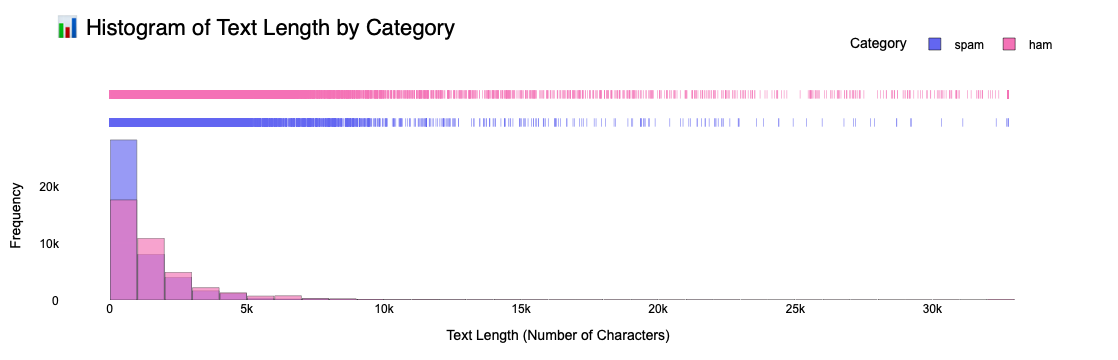

In [144]:
# Improved histogram by category
fig = px.histogram(
    df,
    x='Length',
    color='Category',
    marginal='rug',
    nbins=60,
    barmode='overlay',
    opacity=0.65,
    title='📊 Histogram of Text Length by Category',
    color_discrete_sequence=["#6366f1", "#f472b6"],  # Indigo + Pink
)

fig.update_layout(
    title_font=dict(size=22, family='Helvetica', color='black'),
    xaxis_title='Text Length (Number of Characters)',
    yaxis_title='Frequency',
    font=dict(family='Arial', size=12, color='black'),
    legend=dict(
        title='Category',
        orientation='h',
        yanchor='bottom',
        y=1.05,
        xanchor='right',
        x=1
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    bargap=0.03,
    margin=dict(t=70, b=60, l=60, r=60),
)

fig.update_traces(
    marker_line_width=0.5,
    marker_line_color='black',
    hovertemplate='Length: %{x}<br>Count: %{y}<br>Category: %{legendgroup}<extra></extra>'
)

# Symmetric gridlines
fig.update_xaxes(showgrid=True, gridwidth=0.3, gridcolor='rgba(255,255,255,0.08)')
fig.update_yaxes(showgrid=True, gridwidth=0.3, gridcolor='rgba(255,255,255,0.08)')

fig.show()


In [146]:
#Let's Label the data as 0 & 1 i.e. Spam as 1 & Ham as 0
df.loc[:,'Category']=df.Category.map({'ham':0, 'spam':1})
df['Category'] = df['Category'].astype(int)
df.head()

Category                                               Text  Length
0         1  ounce feather bowl hummingbird opec moment ala...     148
1         1  wulvob get your medircations online qnb ikud v...     808
2         0   computer connection from cnn com wednesday es...    2235
3         1  university degree obtain a prosperous future m...     592
4         0  thanks for all your answers guys i know i shou...    1362

In [148]:
# Split categories
spam = df[df['Category'] == 1]
ham = df[df['Category'] == 0].copy()

# Clean ham text by removing variations of "EscapeNumber"
ham['Text'] = ham['Text'].astype(str).str.replace(r'\bescape\s?number\b', '', case=False, regex=True)

# WordCloud generator with transparent background and visible title
def generate_wordcloud(data, title, colormap='cool', save=False, filename='wordcloud.png'):
    text = ' '.join(data['Text'].astype(str))
    wordcloud = WordCloud(
        stopwords=STOPWORDS,
        max_words=1000,
        max_font_size=250,
        width=2000,
        height=800,
        background_color=None,
        mode='RGBA',
        colormap=colormap,
        random_state=42
    ).generate(text)

    plt.figure(figsize=(16, 8), facecolor='none')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=22, color='Black', pad=20)
    plt.tight_layout(pad=10)

    if save:
        plt.savefig(filename, dpi=300, transparent=True)
    plt.show()


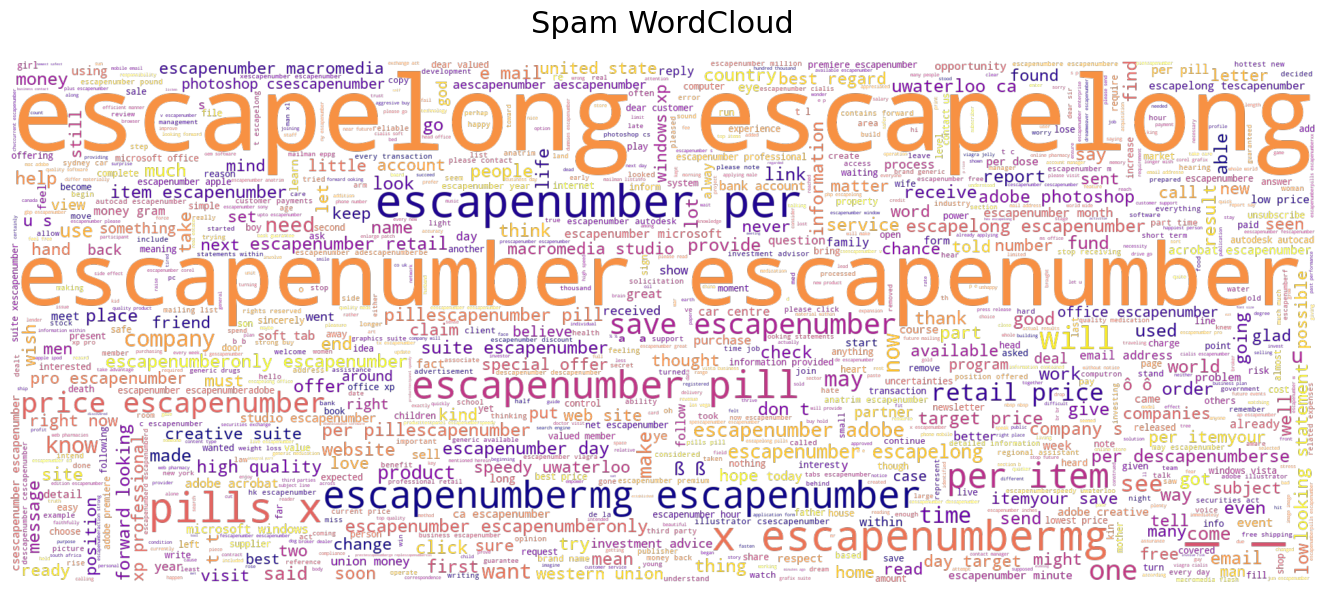

In [149]:
generate_wordcloud(spam, 'Spam WordCloud', colormap='plasma', save=True, filename='spam_wordcloud.png')


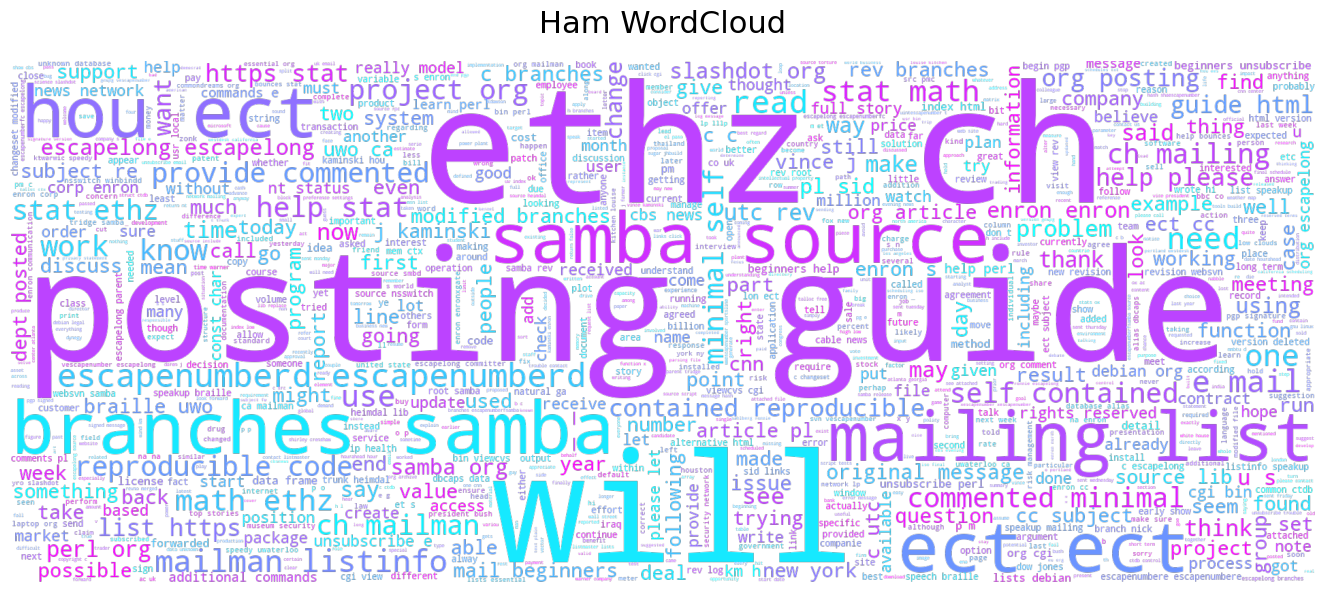

In [151]:
generate_wordcloud(ham, 'Ham WordCloud', colormap='cool', save=True, filename='ham_wordcloud.png')

## **Preprocessing**

In [153]:
df['Text'] = df['Text'].str.lower()
print(df['Text'][6])

michael pobega wrote i'm not sure if it's the mpl or mozilla that didn't allow the distribution of their images or the patching of programs without their knowledge but i think that is not dfsg free last time i looked the mozilla images were in an other licenses directory so not under the mpl and not licensed to others at all hope that helps mjr slef my opinion only see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct to unsubscribe email to debian legal request lists debian org with a subject of unsubscribe trouble contact listmaster lists debian org


In [154]:
#digit removal
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\d+', '', x))
print(df['Text'][6])

michael pobega wrote i'm not sure if it's the mpl or mozilla that didn't allow the distribution of their images or the patching of programs without their knowledge but i think that is not dfsg free last time i looked the mozilla images were in an other licenses directory so not under the mpl and not licensed to others at all hope that helps mjr slef my opinion only see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct to unsubscribe email to debian legal request lists debian org with a subject of unsubscribe trouble contact listmaster lists debian org


In [155]:
df['Text'] = df['Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(df['Text'][6])

michael pobega wrote im not sure if its the mpl or mozilla that didnt allow the distribution of their images or the patching of programs without their knowledge but i think that is not dfsg free last time i looked the mozilla images were in an other licenses directory so not under the mpl and not licensed to others at all hope that helps mjr slef my opinion only see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct to unsubscribe email to debian legal request lists debian org with a subject of unsubscribe trouble contact listmaster lists debian org


In [156]:
#remove extra whitespace
df['Text'] = df['Text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())
print(df['Text'][6])

michael pobega wrote im not sure if its the mpl or mozilla that didnt allow the distribution of their images or the patching of programs without their knowledge but i think that is not dfsg free last time i looked the mozilla images were in an other licenses directory so not under the mpl and not licensed to others at all hope that helps mjr slef my opinion only see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct to unsubscribe email to debian legal request lists debian org with a subject of unsubscribe trouble contact listmaster lists debian org


In [157]:
#stopword removal
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['Text'] = df['Text'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)
print(df['Text'][6])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gowrisriram/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


michael pobega wrote im sure mpl mozilla didnt allow distribution images patching programs without knowledge think dfsg free last time looked mozilla images licenses directory mpl licensed others hope helps mjr slef opinion see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct unsubscribe email debian legal request lists debian org subject unsubscribe trouble contact listmaster lists debian org


In [159]:
df['Text'] = df['Text'].apply(lambda x: x.split())
print(df['Text'][6])

['michael', 'pobega', 'wrote', 'im', 'sure', 'mpl', 'mozilla', 'didnt', 'allow', 'distribution', 'images', 'patching', 'programs', 'without', 'knowledge', 'think', 'dfsg', 'free', 'last', 'time', 'looked', 'mozilla', 'images', 'licenses', 'directory', 'mpl', 'licensed', 'others', 'hope', 'helps', 'mjr', 'slef', 'opinion', 'see', 'http', 'people', 'debian', 'org', 'mjr', 'please', 'follow', 'http', 'www', 'uk', 'debian', 'org', 'mailinglists', 'codeofconduct', 'unsubscribe', 'email', 'debian', 'legal', 'request', 'lists', 'debian', 'org', 'subject', 'unsubscribe', 'trouble', 'contact', 'listmaster', 'lists', 'debian', 'org']


In [160]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

df['Text'] = df['Text'].apply(
    lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]
)
print(df['Text'][6])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gowrisriram/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gowrisriram/nltk_data...


['michael', 'pobega', 'wrote', 'im', 'sure', 'mpl', 'mozilla', 'didnt', 'allow', 'distribution', 'image', 'patching', 'program', 'without', 'knowledge', 'think', 'dfsg', 'free', 'last', 'time', 'looked', 'mozilla', 'image', 'license', 'directory', 'mpl', 'licensed', 'others', 'hope', 'help', 'mjr', 'slef', 'opinion', 'see', 'http', 'people', 'debian', 'org', 'mjr', 'please', 'follow', 'http', 'www', 'uk', 'debian', 'org', 'mailinglists', 'codeofconduct', 'unsubscribe', 'email', 'debian', 'legal', 'request', 'list', 'debian', 'org', 'subject', 'unsubscribe', 'trouble', 'contact', 'listmaster', 'list', 'debian', 'org']


In [165]:
df['Text'] = df['Text'].apply(lambda tokens: ' '.join(tokens))
print(df['Text'][6])

michael pobega wrote im sure mpl mozilla didnt allow distribution image patching program without knowledge think dfsg free last time looked mozilla image license directory mpl licensed others hope help mjr slef opinion see http people debian org mjr please follow http www uk debian org mailinglists codeofconduct unsubscribe email debian legal request list debian org subject unsubscribe trouble contact listmaster list debian org


In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)  # or more based on dataset size
X = vectorizer.fit_transform(df['Text']).toarray()
y = df['Category']
import joblib
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [174]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# count = CountVectorizer()
# text = count.fit_transform(df['Text'])
#Train & test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)